# SEIR with births and natural deaths
This is the Python version of program 2.6 from page 41 of "Modeling Infectious Disease in humans and animals" by Keeling & Rohani.
This is based on code written by Ilias Soumpasis.

In [1]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Parameters (rates here are specified in terms of days)
beta=520/365.0  #transmission rate
gamma=1/7 #recovery rate
sigma=1/14.0      #incubation time is 1/sigma
mu=1/(70*365.0)    #death/birth rate

TS=1.0  #time step for integration
ND=60*365 #number of days (end of simulation)


S0=0.1 #initial proportion of the population that is susceptible
E0=1e-4 #intial proportion of the population that is exposed
I0=1e-4 #initial proportion of the population that is infected
INPUT = (S0, I0, E0) #initial conditions

In [4]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP    
	Y[0] = mu - beta * V[0] * V[2] - mu * V[0]
	Y[1] = beta * V[0] * V[2] - sigma * V[1] - mu * V[1]
	Y[2] = sigma * V[1] - gamma * V[2] - mu * V[2]
	return Y   # For odeint

In [5]:
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)
Rec=1. - (RES[:,0]+RES[:,1]+RES[:,2])

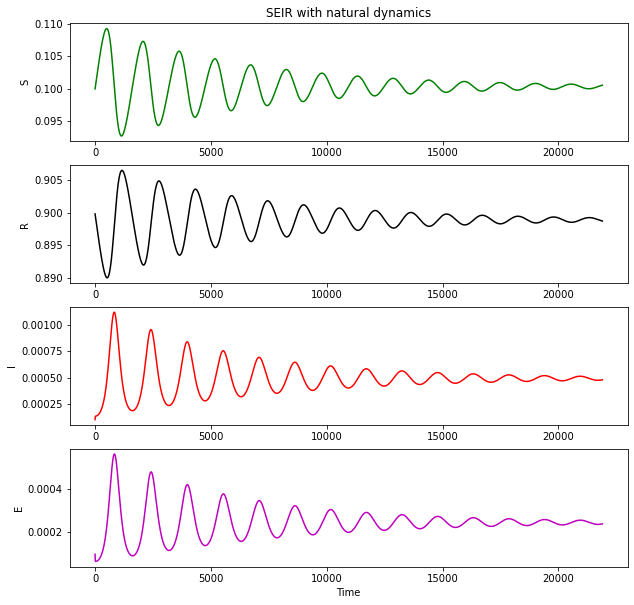

In [32]:
#Ploting
fig = plt.figure(figsize=(10,10))
plt.title('SEIR with natural dynamics')
plt.axis('off')
fig.add_subplot(411)
plt.plot(RES[:,0], '-g')
plt.ylabel('S')
fig.add_subplot(412)
plt.plot(Rec, '-k')
plt.ylabel('R')

fig.add_subplot(413)
plt.plot(RES[:,1], '-r')
plt.ylabel('I')
fig.add_subplot(414)
plt.plot(RES[:,2],'-m')
plt.ylabel('E')
plt.xlabel('Time')

plt.show()
fig.savefig('SEIR_natural_dynamics.pdf')